<a href="https://colab.research.google.com/github/zeynepbeyzaborekci/zeynepbeyza.github.io/blob/main/end_to_end_dataScience_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gerekli kütühanelerin porjeye eklenmesi


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import  LabelEncoder


In [ ]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Smoker ile Charges arasındaki ilişki

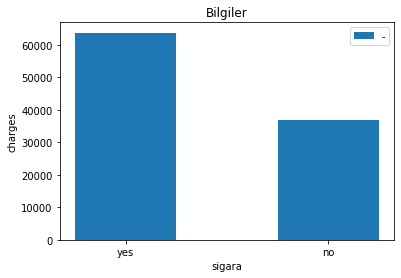

In [ ]:

 
plt.bar(df.smoker,df.charges,
label="-",width=.5)

plt.legend()
plt.xlabel('sigara')
plt.ylabel('charges')
plt.title('Bilgiler')
plt.show()

In [ ]:
df[df["smoker"] == "yes" ].mean().to_frame


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<bound method Series.to_frame of age            38.514599
bmi            30.708449
children        1.113139
charges     32050.231832
dtype: float64>

In [ ]:
df[df["smoker"] == "no" ].mean().to_frame

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


<bound method Series.to_frame of age           39.385338
bmi           30.651795
children       1.090226
charges     8434.268298
dtype: float64>

Sigara içenlerin ortalama charges değeri 32050 iken, içmeyenlerin ortalama charges değerinin 8434 olduğu hesaplanmıştır.

# Sigara içenlerin bölgelere göre dağılımı

In [ ]:
smokers = df[df["smoker"] =='yes']
smokers["region"].value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

#Sigara içmeyenlerin bölgelere göre dağılımı

In [ ]:
non_smokers = df[df["smoker"] =='no']
non_smokers["region"].value_counts()

southeast    273
northwest    267
southwest    267
northeast    257
Name: region, dtype: int64

# Bmi ile Sex arasındaki ilişki

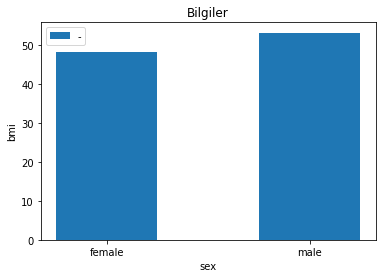

In [ ]:
plt.bar(df.sex,df.bmi,
label="-",width=.5)

plt.legend()
plt.xlabel('sex')
plt.ylabel('bmi')
plt.title('Bilgiler')
plt.show()

İstatistiksel değerler eklenecek


# En çok çocuğa sahip bölge

In [ ]:
df.groupby("region").agg({"children": "sum"})

,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


#Age ile Bmi arasındaki ilişki

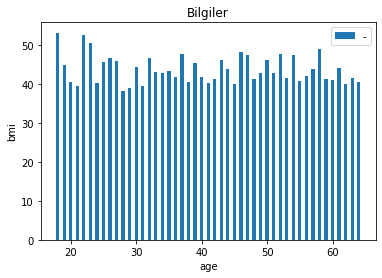

In [ ]:
plt.bar(df.age,df.bmi,
label="-",width=.5)

plt.legend()
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('Bilgiler')
plt.show()

# Children ile Bmi arasındaki ilişki

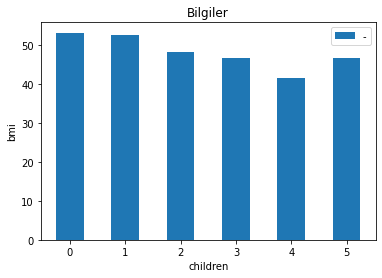

In [ ]:
plt.bar(df.children,df.bmi,
label="-",width=.5)

plt.legend()
plt.xlabel('children')
plt.ylabel('bmi')
plt.title('Bilgiler')
plt.show()

Bmi'ın maks değeri yerine ort. değeri yazılacak.


# Bmi değişkeninde outlier var mı?

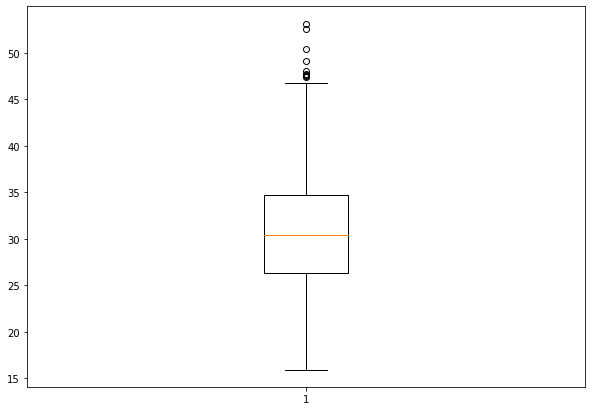

In [ ]:
np.random.seed(10)

exData = df['bmi']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(exData)
 
# show plot
plt.show()

# Bmi ile Charges arasındaki ilişki

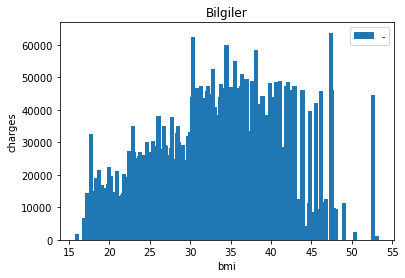

In [ ]:
plt.bar(df.bmi,df.charges,
label="-",width=.5)

plt.legend()
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Bilgiler')
plt.show()

#Region, Smoker, bmi arasındaki ilişki yapılacak.

# Kategorik değişkenlerin Label-Encoding yöntemi ile encode edilmesi

In [ ]:
def label_encoder(dataframe, binary_col):
  labelencoder=LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe


label_encoder(df, 'sex')
label_encoder(df, 'smoker')


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


# One-Hot-Encoding yöntemi ile region bilgisi encode edilecek.

In [ ]:
df = pd.get_dummies(df, columns=["region"], drop_first=True)


# ? dummy tuzağına takılmamak için ilk sütunu düşürdük(drop_first=True) 

In [ ]:
X = df.drop('charges', axis=1)
y = df.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55)


In [ ]:
ss = StandardScaler()
ss.fit_transform(df)

array([[-1.43876426, -1.0105187 , -0.45332   , ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.76548098,
        -0.61132367, -0.56641788]])

In [ ]:
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1
